# Research Questions

## RQ3.Was the performance the same between public and private schools?

## RQ4.Was school performance the same for urban and rural schools?

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
data = pd.read_csv('data/performance_data_pass.csv')
data.head()

,Ano,Localização,Rede,Total - EF,1EF,2EF,3EF,4EF,5EF,6EF,7EF,8EF,9EF,Total - EM,1EM,2EM,3EM,4EM,Não-Seriado
0,2020,Urbana,Total,98.2,98.1,98.5,98.4,98.7,98.7,97.7,97.8,98.0,97.9,95.0,94.1,95.8,95.5,85.7,90.2
1,2020,Rural,Total,98.1,99.2,99.1,98.4,98.4,97.7,97.3,97.4,97.5,97.3,95.0,94.1,96.0,95.4,86.2,94.7
2,2019,Urbana,Total,93.4,98.6,97.7,92.4,95.3,95.7,88.8,89.6,91.4,92.5,86.1,80.5,87.3,92.5,88.9,86.0
3,2019,Rural,Total,89.1,97.8,96.4,85.9,87.9,88.8,81.4,85.4,88.1,91.4,85.8,81.1,86.9,91.7,88.7,80.7
4,2018,Urbana,Total,92.1,98.2,97.5,91.0,94.2,94.8,86.8,87.6,89.7,90.7,83.4,76.6,84.9,90.5,87.4,81.2


In [40]:
data.Ano.unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007])

In [41]:
approval_urban_rural = data[(data.Localização == 'Urbana') | (data.Localização == 'Rural')]
approval_public_private = data[(data.Rede == 'Privada') | (data.Rede == 'Pública')]

# Approval Rate 

In [14]:
general_approval_rates = pd.read_csv('data/EF_EM_rede_localizacao_total.csv')
general_approval_rates

,Ano,Localização,Rede,Total - EF,1EF,2EF,3EF,4EF,5EF,6EF,7EF,8EF,9EF,Total - EM,1EM,2EM,3EM,4EM,Não-Seriado
0,2020,Total,Total,98.2,98.3,98.6,98.4,98.7,98.5,97.6,97.7,97.9,97.8,95.0,94.1,95.8,95.5,85.7,91.2
1,2019,Total,Total,92.8,98.5,97.5,91.4,94.1,94.7,87.9,89.1,91.0,92.3,86.1,80.5,87.3,92.5,88.9,85.1
2,2018,Total,Total,91.5,98.1,97.4,89.9,92.9,93.6,85.8,87.1,89.3,90.6,83.4,76.7,85.0,90.5,87.6,81.0
3,2017,Total,Total,91.0,98.0,97.2,89.5,92.8,93.1,84.5,86.5,88.7,89.6,83.1,76.4,84.7,90.5,85.2,84.5
4,2016,Total,Total,89.8,97.8,96.9,88.4,91.7,92.0,82.8,84.9,86.8,88.3,81.5,74.1,83.2,89.7,86.0,84.7
5,2015,Total,Total,89.9,97.7,96.8,88.5,91.7,92.1,82.9,84.6,87.3,88.6,81.7,74.6,83.6,89.5,87.7,84.2
6,2014,Total,Total,89.2,97.5,96.3,87.8,91.2,91.7,81.6,84.2,86.4,87.5,80.3,73.5,81.9,88.4,87.8,84.5
7,2013,Total,Total,89.3,97.4,95.8,88.5,91.6,91.2,82.2,84.5,86.8,87.6,80.1,73.2,82.0,88.0,88.0,83.1
8,2012,Total,Total,88.2,96.8,93.7,87.6,90.7,90.8,80.9,83.5,86.2,86.4,78.7,71.6,80.4,86.8,89.9,82.5
9,2011,Total,Total,87.6,96.5,91.9,87.1,90.9,90.5,80.1,83.4,85.2,85.5,77.4,70.2,79.4,85.5,88.3,79.4


In [15]:
general_approval_rates['Total - EF'][1:14].mean()

88.3076923076923

In [16]:
general_approval_rates['Total - EM'][1:14].mean()

79.56923076923077

In [19]:
full_rural_approval = data.query('Localização == "Rural" & Rede == "Total"')
full_urban_approval = data.query('Localização == "Urbana" & Rede == "Total"')
full_public_approval = data.query('Localização == "Total" & Rede == "Pública"')
full_private_approval = data.query('Localização == "Total" & Rede == "Privada"')

## By Location 

In [28]:
#slice from 1 because index 0 is 2020, the year of the pandemic

rural_approval_mean_bp_es = full_rural_approval['Total - EF'][1:14].mean()
rural_approval_mean_bp_hs = full_rural_approval['Total - EM'][1:14].mean()
urban_approval_mean_bp_es = full_urban_approval['Total - EF'][1:14].mean()
urban_approval_mean_bp_hs = full_urban_approval['Total - EM'][1:14].mean()

### Urban x Rural - Elementary School

In [42]:
marker = 'o','s'
x_shift = 0.13
y_shift = 0.15
markersize=9

In [44]:
approval_urban_rural.head()

,Ano,Localização,Rede,Total - EF,1EF,2EF,3EF,4EF,5EF,6EF,7EF,8EF,9EF,Total - EM,1EM,2EM,3EM,4EM,Não-Seriado
0,2020,Urbana,Total,98.2,98.1,98.5,98.4,98.7,98.7,97.7,97.8,98.0,97.9,95.0,94.1,95.8,95.5,85.7,90.2
1,2020,Rural,Total,98.1,99.2,99.1,98.4,98.4,97.7,97.3,97.4,97.5,97.3,95.0,94.1,96.0,95.4,86.2,94.7
2,2019,Urbana,Total,93.4,98.6,97.7,92.4,95.3,95.7,88.8,89.6,91.4,92.5,86.1,80.5,87.3,92.5,88.9,86.0
3,2019,Rural,Total,89.1,97.8,96.4,85.9,87.9,88.8,81.4,85.4,88.1,91.4,85.8,81.1,86.9,91.7,88.7,80.7
4,2018,Urbana,Total,92.1,98.2,97.5,91.0,94.2,94.8,86.8,87.6,89.7,90.7,83.4,76.6,84.9,90.5,87.4,81.2


In [45]:
def translate_to_urban(value):
    if value == "Urbana":
        return "Urban"
    else:
        return "Rural"

approval_urban_rural['Localização'] = approval_urban_rural.Localização.apply(translate_to_urban)

<ipython-input-45-f38c0048d1ab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  approval_urban_rural['Localização'] = approval_urban_rural.Localização.apply(translate_to_urban)


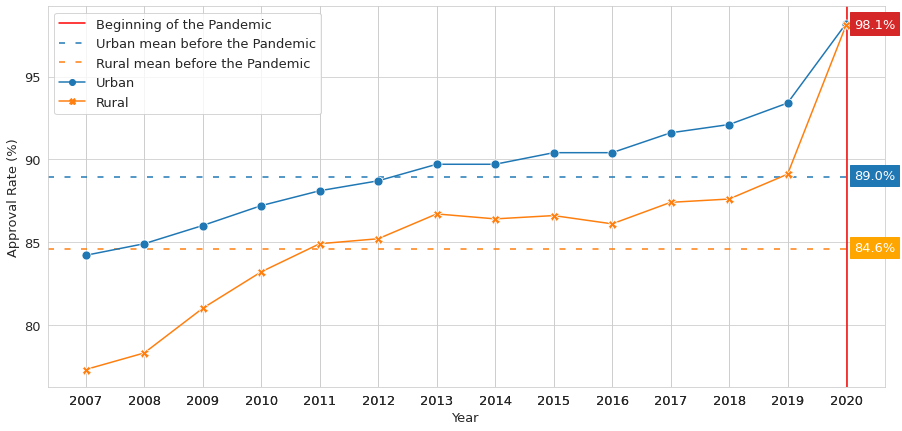

In [221]:
plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")

plt.axvline(x=2020.01, label="Beginning of the Pandemic", color='red', linestyle='-')
plt.axhline(y=urban_approval_mean_bp_es, color='tab:blue', linestyle='dashed', dashes=(4, 7),
            label="Urban mean before the Pandemic")
plt.text(2020 + x_shift, urban_approval_mean_bp_es - y_shift, '{:.1f}%'.format(urban_approval_mean_bp_es), color='white').set_backgroundcolor('tab:blue')
plt.axhline(y=rural_approval_mean_bp_es, color='tab:orange', linestyle='dashed', dashes=(4, 7),
            label="Rural mean before the Pandemic")
plt.text(2020 + x_shift, rural_approval_mean_bp_es - y_shift, '{:.1f}%'.format(rural_approval_mean_bp_es), color='white').set_backgroundcolor('orange')

ax = sns.lineplot(data=approval_urban_rural, x='Ano', y='Total - EF', 
                  hue='Localização', style='Localização', markers=True, 
                  markersize=markersize, dashes=False)
plt.rcParams.update({'font.size': 13})

ax.set(xticks=approval_urban_rural.Ano.values)

#plt.title("Approval Rate in Elementary Schools by Localization")
plt.ylabel("Approval Rate (%)")
plt.xlabel("Year")
plt.legend().set_title(None)

y_2020_urban = approval_urban_rural.query('Ano == 2020 & Localização == "Urban"')['Total - EF'].iloc[0]
plt.text(2020 + x_shift, y_2020_urban - y_shift, '{:.1f}%'.format(y_2020_urban), color='white').set_backgroundcolor('tab:red')

y_2020_rural = approval_urban_rural.query('Ano == 2020 & Localização == "Rural"')['Total - EF'].iloc[0]
plt.text(2020 + x_shift, y_2020_rural - y_shift, '{:.1f}%'.format(y_2020_rural), color='white').set_backgroundcolor('tab:red')

In [94]:
def print_values_on_top(barplot, shift):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f')+ '%', 
                   (p.get_x() + shift + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,9), 
                   textcoords = 'offset points')

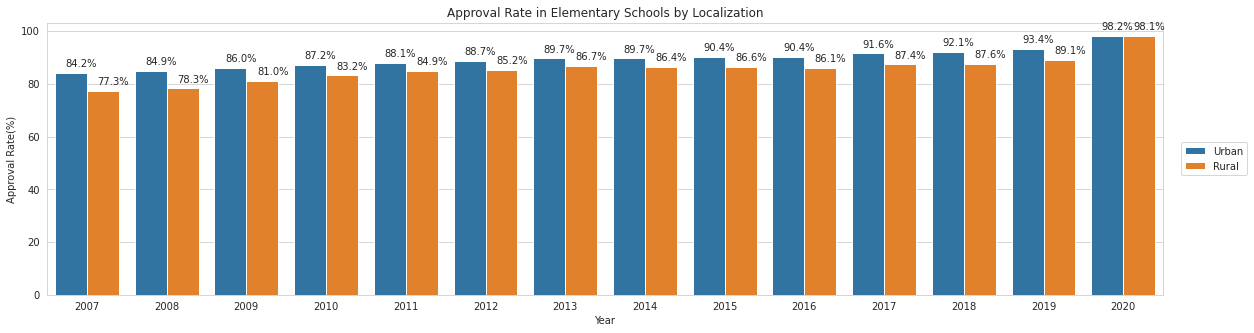

In [158]:
plt.figure(figsize=(20, 5))
#plt.axvline(x=12.5, label="Beginning of the Pandemic", color="red", linestyle='-')
sns.set_style("whitegrid")

barplot = sns.barplot(data=approval_urban_rural, x='Ano', y='Total - EF', 
                  hue='Localização')

print_values_on_top(barplot, 0.13)

plt.title("Approval Rate in Elementary Schools by Localization")
plt.ylabel("Approval Rate(%)")
plt.xlabel("Year");
plt.legend().set_title(None)
plt.legend(loc="right", bbox_to_anchor=(1.08, 0.5), ncol=1);

### Urban x Rural - High School 

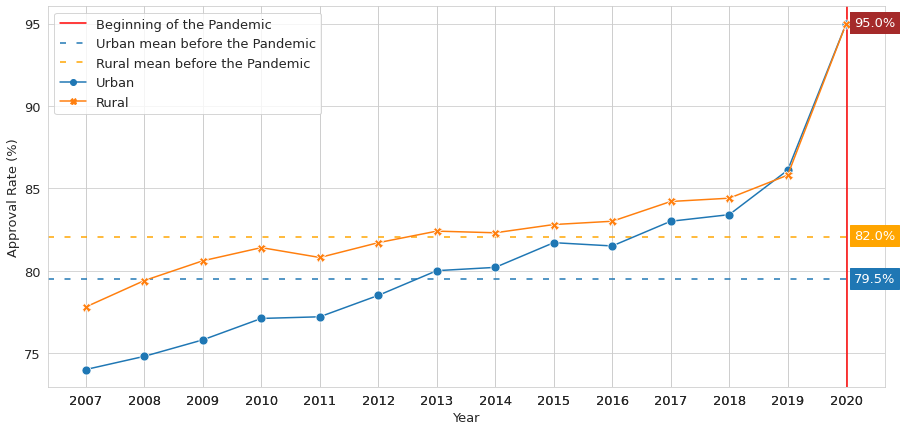

In [222]:
plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")

plt.axvline(x=2020.01, label="Beginning of the Pandemic", color='red', linestyle='-')
plt.axhline(y=urban_approval_mean_bp_hs, color='tab:blue', linestyle='dashed', dashes=(4, 7),
            label="Urban mean before the Pandemic")
plt.text(2020 + x_shift, urban_approval_mean_bp_hs - y_shift, '{:.1f}%'.format(urban_approval_mean_bp_hs), color='white').set_backgroundcolor('tab:blue')
plt.axhline(y=rural_approval_mean_bp_hs, color='Orange', linestyle='dashed', dashes=(4, 7),
            label="Rural mean before the Pandemic")
plt.text(2020 + x_shift, rural_approval_mean_bp_hs - y_shift, '{:.1f}%'.format(rural_approval_mean_bp_hs), color='white').set_backgroundcolor('orange')

ax = sns.lineplot(data=approval_urban_rural, x='Ano', y='Total - EM', 
                  hue='Localização', style='Localização', markers=True, 
                  markersize=markersize, dashes=False)
plt.rcParams.update({'font.size': 13})

ax.set(xticks=approval_urban_rural.Ano.values)

#plt.title("Approval Rate in High Schools by Localization")
plt.ylabel("Approval Rate (%)")
plt.xlabel("Year")
plt.legend().set_title(None)

y_2020_urban = approval_urban_rural.query('Ano == 2020 & Localização == "Urban"')['Total - EM'].iloc[0]
plt.text(2020 + x_shift, y_2020_urban - y_shift, '{:.1f}%'.format(y_2020_urban), color='white').set_backgroundcolor('brown')

y_2020_rural = approval_urban_rural.query('Ano == 2020 & Localização == "Rural"')['Total - EM'].iloc[0]
plt.text(2020 + x_shift, y_2020_rural - y_shift, '{:.1f}%'.format(y_2020_rural), color='white').set_backgroundcolor('brown')

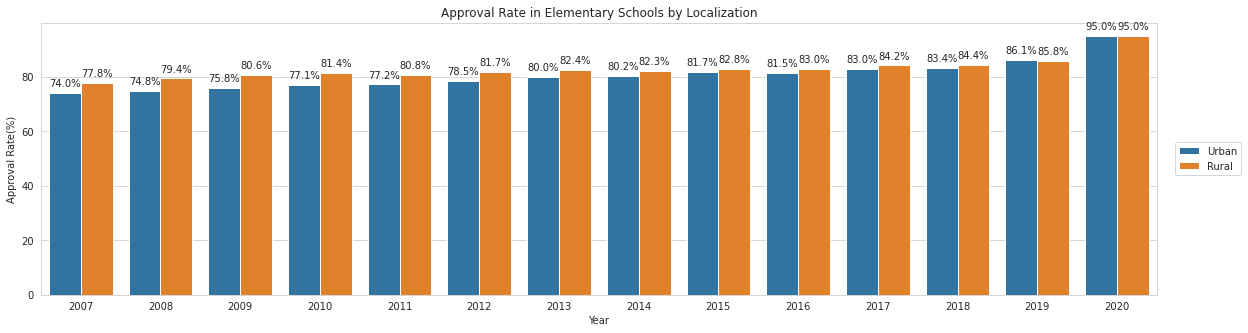

In [153]:
plt.figure(figsize=(20, 5))
#plt.axvline(x=12.5, label="Beginning of the Pandemic", color="red", linestyle='-')
sns.set_style("whitegrid")

barplot = sns.barplot(data=approval_urban_rural, x='Ano', y='Total - EM', 
                  hue='Localização')

print_values_on_top(barplot, 0)

plt.title("Approval Rate in Elementary Schools by Localization")
plt.ylabel("Approval Rate(%)")
plt.xlabel("Year");
plt.legend().set_title(None)
plt.legend(loc="right", bbox_to_anchor=(1.08, 0.5), ncol=1);

## By Network

In [112]:
#slice from 1 because index 0 is 2020, the year of the pandemic
#bp = before pandemic / es = Elementary School / hs = High School

public_approval_mean_bp_es = full_public_approval['Total - EF'][1:14].mean()
public_approval_mean_bp_hs = full_public_approval['Total - EM'][1:14].mean()
private_approval_mean_bp_es = full_private_approval['Total - EF'][1:14].mean()
private_approval_mean_bp_hs = full_private_approval['Total - EM'][1:14].mean()

In [113]:
approval_public_private.head()

,Ano,Localização,Rede,Total - EF,1EF,2EF,3EF,4EF,5EF,6EF,7EF,8EF,9EF,Total - EM,1EM,2EM,3EM,4EM,Não-Seriado
28,2020,Total,Privada,97.3,93.9,96.1,96.9,97.6,98.0,98.0,98.4,98.7,98.8,98.8,98.3,99.1,99.4,83.0,93.1
29,2020,Total,Pública,98.4,99.3,99.2,98.7,98.9,98.6,97.6,97.6,97.8,97.7,94.4,93.6,95.3,94.9,85.9,91.0
30,2019,Total,Privada,98.2,98.7,99.0,98.8,98.9,98.8,97.4,97.0,97.1,97.1,96.4,94.0,96.8,98.6,97.4,95.9
31,2019,Total,Pública,91.7,98.4,97.2,89.8,93.1,93.8,86.2,87.7,89.9,91.5,84.7,78.7,85.9,91.6,88.5,84.0
32,2018,Total,Privada,98.0,98.5,98.9,98.7,98.8,98.8,97.3,96.6,96.8,96.7,96.0,93.5,96.5,98.5,89.0,94.4


In [114]:
def translate_network(value):
    if value == "Pública":
        return "Public"
    
    if value == 'Privada':
        return "Private"

approval_public_private['Rede'] = approval_public_private.Rede.apply(translate_network)

<ipython-input-114-5aad4f5bdea2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  approval_public_private['Rede'] = approval_public_private.Rede.apply(translate_network)


### Public x Private - Elementary School 

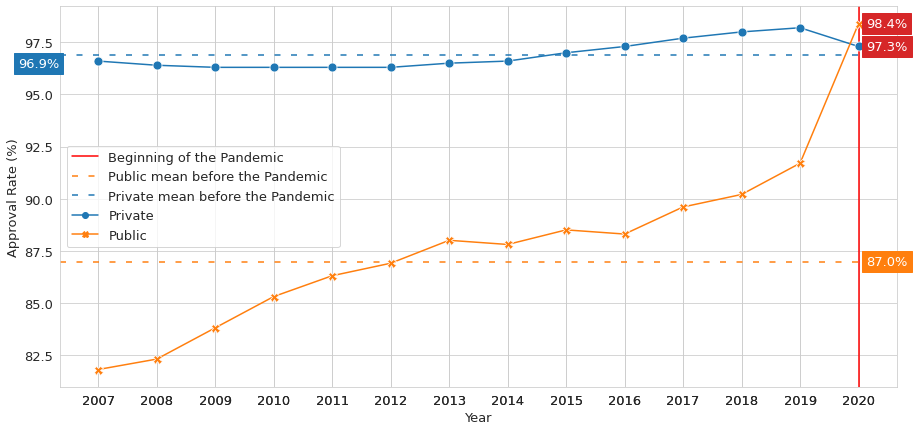

In [218]:
plt.figure(figsize=(15,7))
sns.set_style("whitegrid")

plt.axvline(x=2020.01, label="Beginning of the Pandemic", color='red', linestyle='-')
plt.axhline(y=public_approval_mean_bp_es, color='tab:orange', linestyle='dashed', dashes=(4, 7),
            label="Public mean before the Pandemic")
plt.text(2020 + x_shift, public_approval_mean_bp_es - y_shift, '{:.1f}%'.format(public_approval_mean_bp_es), 
         color='white').set_backgroundcolor('tab:orange')
plt.axhline(y=private_approval_mean_bp_es, color='tab:blue', linestyle='dashed', dashes=(4, 7),
            label="Private mean before the Pandemic")
plt.text(2005.5 + x_shift, private_approval_mean_bp_es - y_shift - 0.4, '{:.1f}%'.format(private_approval_mean_bp_es), 
         color='white').set_backgroundcolor('tab:blue')

ax = sns.lineplot(data=approval_public_private, x='Ano', y='Total - EF', 
                  hue='Rede', style='Rede', markers=True, 
                  markersize=markersize, dashes=False)

ax.set(xticks=approval_public_private.Ano.values)

#plt.title("Approval Rate in Elementary Schools by Network")
plt.ylabel("Approval Rate (%)")
plt.xlabel("Year")
plt.legend().set_title(None)
plt.rcParams.update({'font.size': 13})

y_2020_public = approval_public_private.query('Ano == 2020 & Rede == "Public"')['Total - EF'].iloc[0]
plt.text(2020 + x_shift, y_2020_public - y_shift, '{:.1f}%'.format(y_2020_public), color='white').set_backgroundcolor('tab:red')

y_2020_private = approval_public_private.query('Ano == 2020 & Rede == "Private"')['Total - EF'].iloc[0]
plt.text(2020 + x_shift, y_2020_private - y_shift, '{:.1f}%'.format(y_2020_private), color='white').set_backgroundcolor('tab:red')

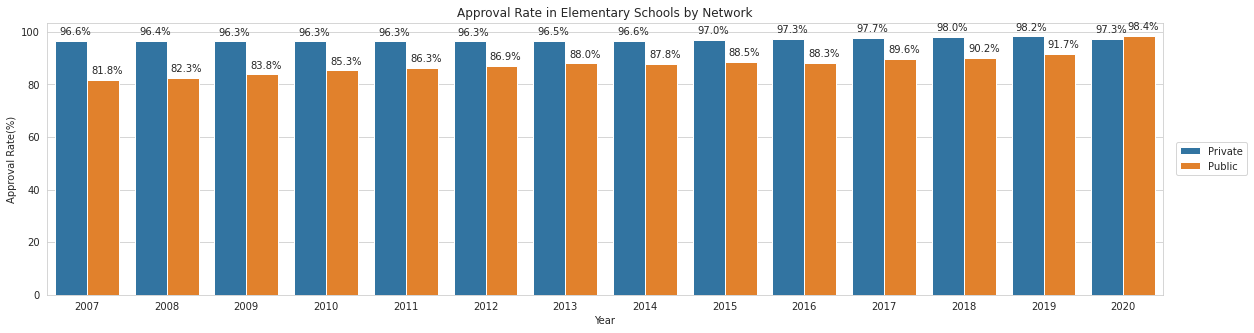

In [152]:
plt.figure(figsize=(20, 5))
sns.set_style("whitegrid")

barplot = sns.barplot(data=approval_public_private, x='Ano', y='Total - EF', 
                  hue='Rede')

print_values_on_top(barplot, 0.05)

plt.title("Approval Rate in Elementary Schools by Network")
plt.ylabel("Approval Rate(%)")
plt.xlabel("Year")
plt.legend().set_title(None)
plt.legend(loc="right", bbox_to_anchor=(1.08, 0.5), ncol=1);

### Public x Private - High School

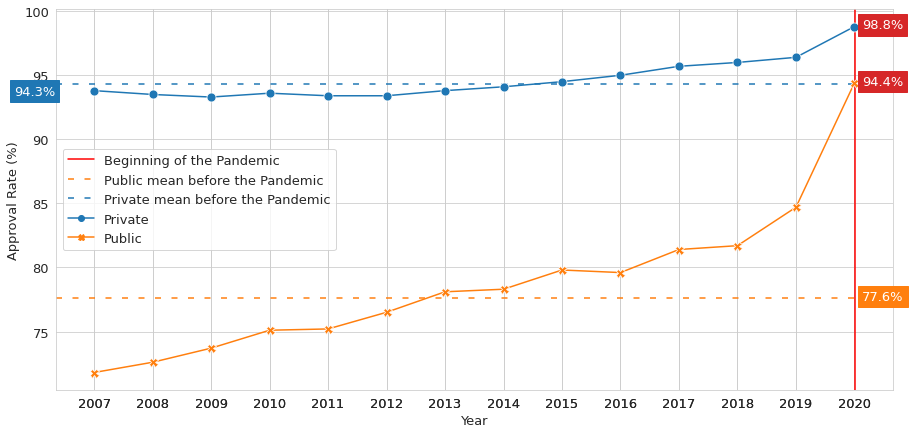

In [220]:
plt.figure(figsize=(15,7))
sns.set_style("whitegrid")

plt.axvline(x=2020.01, label="Beginning of the Pandemic", color='red', linestyle='-')

plt.axhline(y=public_approval_mean_bp_hs, color='tab:orange', linestyle='dashed', dashes=(4, 7),
            label="Public mean before the Pandemic")
plt.text(2020 + x_shift, public_approval_mean_bp_hs - y_shift, '{:.1f}%'.format(public_approval_mean_bp_hs), 
         color='white').set_backgroundcolor('tab:orange')

plt.axhline(y=private_approval_mean_bp_hs, color='tab:blue', linestyle='dashed', dashes=(4, 7),
            label="Private mean before the Pandemic")
plt.text(2005.5 + x_shift, private_approval_mean_bp_hs - y_shift - 0.7, '{:.1f}%'.format(private_approval_mean_bp_hs), 
         color='white').set_backgroundcolor('tab:blue')

ax = sns.lineplot(data=approval_public_private, x='Ano', y='Total - EM', 
                  hue='Rede', style='Rede', markers=True, 
                  markersize=markersize, dashes=False)

ax.set(xticks=approval_public_private.Ano.values)

#plt.title("Approval Rate in High Schools by Network")
plt.ylabel("Approval Rate (%)")
plt.xlabel("Year")
plt.legend().set_title(None)
plt.rcParams.update({'font.size': 13})

y_2020_public = approval_public_private.query('Ano == 2020 & Rede == "Public"')['Total - EM'].iloc[0]
plt.text(2020 + x_shift, y_2020_public - y_shift, '{:.1f}%'.format(y_2020_public), color='white').set_backgroundcolor('tab:red')

y_2020_private = approval_public_private.query('Ano == 2020 & Rede == "Private"')['Total - EM'].iloc[0]
plt.text(2020 + x_shift, y_2020_private - y_shift, '{:.1f}%'.format(y_2020_private), color='white').set_backgroundcolor('tab:red')

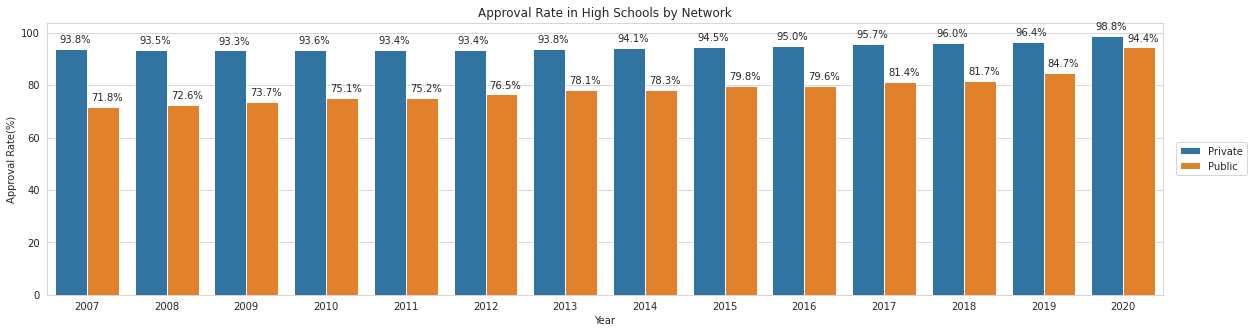

In [162]:
plt.figure(figsize=(20, 5))
sns.set_style("whitegrid")

barplot = sns.barplot(data=approval_public_private, x='Ano', y='Total - EM', 
                  hue='Rede')

print_values_on_top(barplot, 0.05)

plt.title("Approval Rate in High Schools by Network")
plt.ylabel("Approval Rate(%)")
plt.xlabel("Year")
plt.legend().set_title(None)
plt.legend(loc="right", bbox_to_anchor=(1.08, 0.5), ncol=1);

# Failure Rate

In [163]:
fail_data = pd.read_csv('data/final_fail_dataset.csv')
fail_data.head()

,Ano,Localização,Rede,R_EF_Total,R1EF,R2EF,R3EF,4REF,R5EF,R6EF,R7EF,R8EF,R9EF,RTotal - EM,R1EM,R2EM,R3EM,R4EM,RNão-Seriado
0,2020,Urbana,Total,0.8,0.4,0.5,0.7,0.5,0.6,1.1,1.1,1.0,1.2,2.7,3.2,2.2,2.6,6.3,6.9
1,2020,Rural,Total,0.7,0.2,0.3,0.8,0.6,1.1,0.9,0.8,0.7,0.8,2.6,3.2,1.9,2.4,5.2,3.2
2,2019,Urbana,Total,5.6,1.0,2.0,7.2,4.3,3.8,9.6,8.9,7.1,5.9,9.2,13.6,8.2,4.5,7.2,10.0
3,2019,Rural,Total,8.6,1.2,2.7,13.0,10.6,9.4,14.6,10.7,7.8,4.9,7.5,10.6,6.6,4.0,6.8,11.5
4,2018,Urbana,Total,6.6,1.2,2.1,8.5,5.3,4.5,11.0,10.3,8.3,7.1,10.6,15.6,9.4,5.4,7.9,14.1


In [164]:
fail_urban_rural = fail_data[(fail_data.Localização == 'Urbana') | (fail_data.Localização == 'Rural')]
fail_public_private = fail_data[(fail_data.Rede == 'Privada') | (fail_data.Rede == 'Pública')]

In [165]:
full_rural_fail = fail_data.query('Localização == "Rural" & Rede == "Total"')
full_urban_fail = fail_data.query('Localização == "Urbana" & Rede == "Total"')
full_public_fail = fail_data.query('Localização == "Total" & Rede == "Pública"')
full_private_fail = fail_data.query('Localização == "Total" & Rede == "Privada"')

In [169]:
full_rural_fail.head()

,Ano,Localização,Rede,R_EF_Total,R1EF,R2EF,R3EF,4REF,R5EF,R6EF,R7EF,R8EF,R9EF,RTotal - EM,R1EM,R2EM,R3EM,R4EM,RNão-Seriado
1,2020,Rural,Total,0.7,0.2,0.3,0.8,0.6,1.1,0.9,0.8,0.7,0.8,2.6,3.2,1.9,2.4,5.2,3.2
3,2019,Rural,Total,8.6,1.2,2.7,13.0,10.6,9.4,14.6,10.7,7.8,4.9,7.5,10.6,6.6,4.0,6.8,11.5
5,2018,Rural,Total,9.7,1.4,2.7,14.4,12.1,11.0,16.2,12.3,8.8,5.7,8.4,11.8,7.5,4.4,2.6,12.4
7,2017,Rural,Total,9.7,1.4,2.7,14.5,11.8,11.1,16.5,12.0,8.6,5.8,8.3,11.6,7.4,4.3,3.6,11.5
8,2016,Rural,Total,10.7,1.5,3.0,15.7,13.1,12.4,17.8,13.0,9.7,6.3,8.6,12.2,7.6,4.3,3.8,11.0


## By Location

In [170]:
#slice from 1 because index 0 is 2020, the year of the pandemic

rural_fail_mean_bp_es = full_rural_fail['R_EF_Total'][1:14].mean()
rural_fail_mean_bp_hs = full_rural_fail['RTotal - EM'][1:14].mean()
urban_fail_mean_bp_es = full_urban_fail['R_EF_Total'][1:14].mean()
urban_fail_mean_bp_hs = full_urban_fail['RTotal - EM'][1:14].mean()

In [171]:
fail_urban_rural['Localização'] = fail_urban_rural.Localização.apply(translate_to_urban)

<ipython-input-171-0e2e7e89b47b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fail_urban_rural['Localização'] = fail_urban_rural.Localização.apply(translate_to_urban)


### Urban x Rural - Elementary School

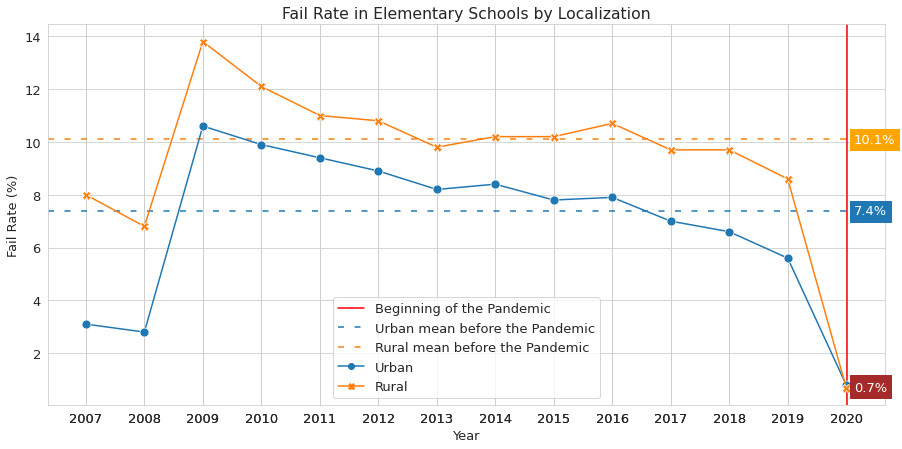

In [183]:
plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")

plt.axvline(x=2020.01, label="Beginning of the Pandemic", color='red', linestyle='-')

plt.axhline(y=urban_fail_mean_bp_es, color='tab:blue', linestyle='dashed', dashes=(4, 7),
            label="Urban mean before the Pandemic")
plt.text(2020 + x_shift, urban_fail_mean_bp_es - y_shift, '{:.1f}%'.format(urban_fail_mean_bp_es), color='white').set_backgroundcolor('tab:blue')

plt.axhline(y=rural_fail_mean_bp_es, color='tab:orange', linestyle='dashed', dashes=(4, 7),
            label="Rural mean before the Pandemic")
plt.text(2020 + x_shift, rural_fail_mean_bp_es - y_shift, '{:.1f}%'.format(rural_fail_mean_bp_es), color='white').set_backgroundcolor('orange')

ax = sns.lineplot(data=fail_urban_rural, x='Ano', y='R_EF_Total', 
                  hue='Localização', style='Localização', markers=True, 
                  markersize=markersize, dashes=False)

ax.set(xticks=approval_urban_rural.Ano.values)

plt.title("Fail Rate in Elementary Schools by Localization")
plt.ylabel("Fail Rate (%)")
plt.xlabel("Year")
plt.legend().set_title(None)

y_2020_urban = fail_urban_rural.query('Ano == 2020 & Localização == "Urban"')['R_EF_Total'].iloc[0]
plt.text(2020 + x_shift, y_2020_urban - y_shift, '{:.1f}%'.format(y_2020_urban), color='white').set_backgroundcolor('brown')

y_2020_rural = fail_urban_rural.query('Ano == 2020 & Localização == "Rural"')['R_EF_Total'].iloc[0]
plt.text(2020 + x_shift, y_2020_rural - y_shift, '{:.1f}%'.format(y_2020_rural), color='white').set_backgroundcolor('brown')

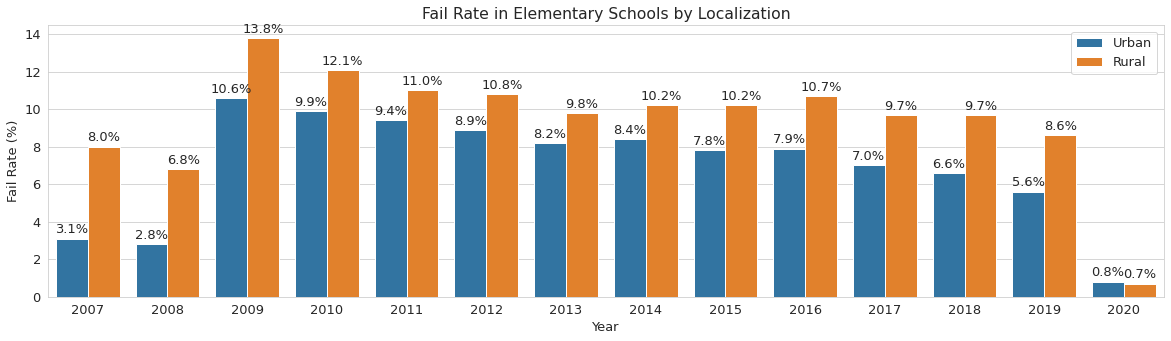

In [180]:
plt.figure(figsize=(20, 5))
sns.set_style("whitegrid")

barplot = sns.barplot(data=fail_urban_rural, x='Ano', y='R_EF_Total', 
                  hue='Localização')
plt.rcParams.update({'font.size': 13})

print_values_on_top(barplot, 0)

plt.title("Fail Rate in Elementary Schools by Localization")
plt.ylabel("Fail Rate (%)")
plt.xlabel("Year")
plt.legend().set_title(None);

### Urban x Rural - High School 

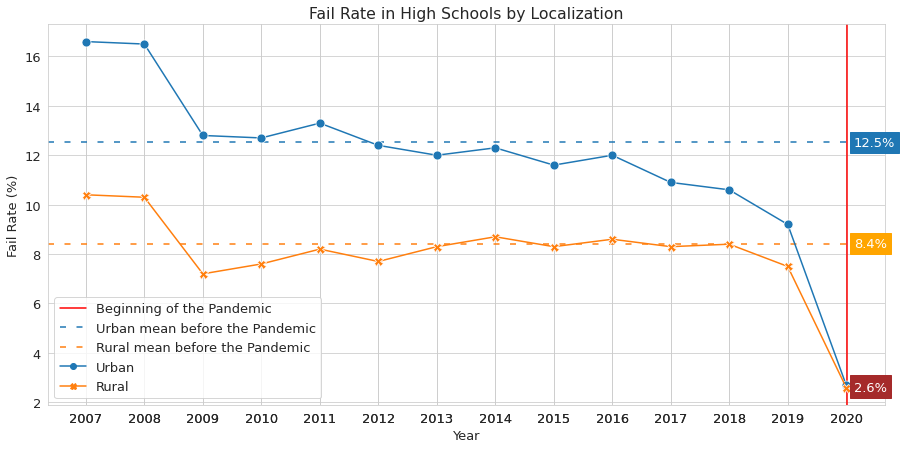

In [184]:
plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")

plt.axvline(x=2020.01, label="Beginning of the Pandemic", color='red', linestyle='-')

plt.axhline(y=urban_fail_mean_bp_hs, color='tab:blue', linestyle='dashed', dashes=(4, 7),
            label="Urban mean before the Pandemic")
plt.text(2020 + x_shift, urban_fail_mean_bp_hs - y_shift, '{:.1f}%'.format(urban_fail_mean_bp_hs), color='white').set_backgroundcolor('tab:blue')

plt.axhline(y=rural_fail_mean_bp_hs, color='tab:orange', linestyle='dashed', dashes=(4, 7),
            label="Rural mean before the Pandemic")
plt.text(2020 + x_shift, rural_fail_mean_bp_hs - y_shift, '{:.1f}%'.format(rural_fail_mean_bp_hs), color='white').set_backgroundcolor('orange')

ax = sns.lineplot(data=fail_urban_rural, x='Ano', y='RTotal - EM', 
                  hue='Localização', style='Localização', markers=True, 
                  markersize=markersize, dashes=False)

ax.set(xticks=fail_urban_rural.Ano.values)

plt.title("Fail Rate in High Schools by Localization")
plt.ylabel("Fail Rate (%)")
plt.xlabel("Year")
plt.legend().set_title(None)

y_2020_urban = fail_urban_rural.query('Ano == 2020 & Localização == "Urban"')['RTotal - EM'].iloc[0]
plt.text(2020 + x_shift, y_2020_urban - y_shift, '{:.1f}%'.format(y_2020_urban), color='white').set_backgroundcolor('brown')

y_2020_rural = fail_urban_rural.query('Ano == 2020 & Localização == "Rural"')['RTotal - EM'].iloc[0]
plt.text(2020 + x_shift, y_2020_rural - y_shift, '{:.1f}%'.format(y_2020_rural), color='white').set_backgroundcolor('brown')

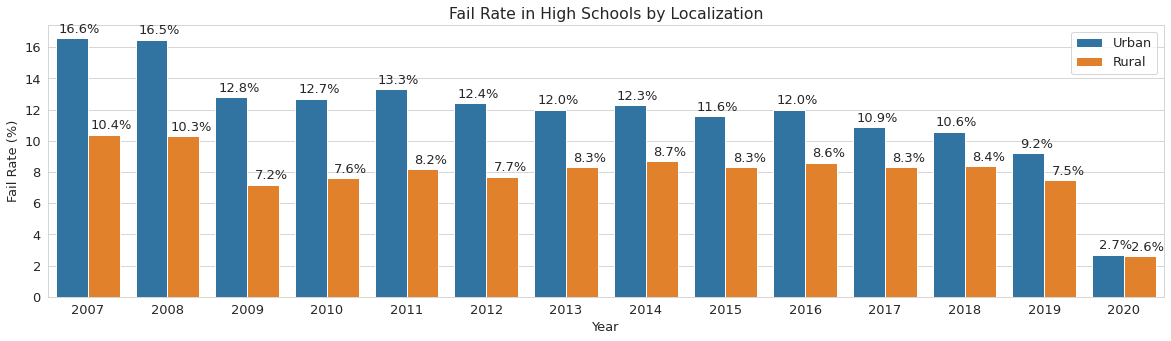

In [186]:
plt.figure(figsize=(20, 5))
sns.set_style("whitegrid")

barplot = sns.barplot(data=fail_urban_rural, x='Ano', y='RTotal - EM', 
                  hue='Localização')
plt.rcParams.update({'font.size': 13});

print_values_on_top(barplot, 0.1)

plt.title("Fail Rate in High Schools by Localization")
plt.ylabel("Fail Rate (%)")
plt.xlabel("Year")
plt.legend().set_title(None);

## By Network 

In [193]:
public_fail_mean_bp_es = full_public_fail['R_EF_Total'][1:14].mean()
public_fail_mean_bp_hs = full_public_fail['RTotal - EM'][1:14].mean()
private_fail_mean_bp_es = full_private_fail['R_EF_Total'][1:14].mean()
private_fail_mean_bp_hs = full_private_fail['RTotal - EM'][1:14].mean()

In [194]:
fail_public_private.Rede = fail_public_private.Rede.apply(translate_network)

/home/aian/.local/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### Public x Private - Elementary School 

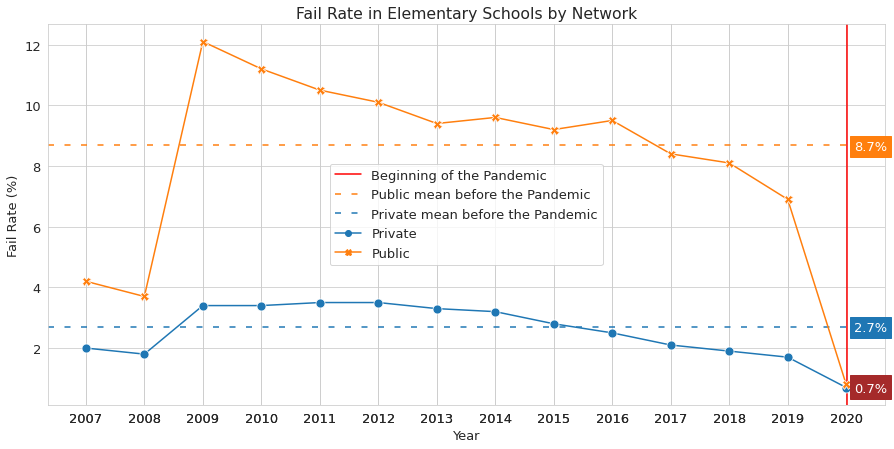

In [203]:
plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")

plt.axvline(x=2020.01, label="Beginning of the Pandemic", color='red', linestyle='-')

plt.axhline(y=public_fail_mean_bp_es, color='tab:orange', linestyle='dashed', dashes=(4, 7),
            label="Public mean before the Pandemic")
plt.text(2020 + x_shift, public_fail_mean_bp_es - y_shift, '{:.1f}%'.format(public_fail_mean_bp_es), color='white').set_backgroundcolor('tab:orange')

plt.axhline(y=private_fail_mean_bp_es, color='tab:blue', linestyle='dashed', dashes=(4, 7),
            label="Private mean before the Pandemic")
plt.text(2020 + x_shift, private_fail_mean_bp_es - y_shift, '{:.1f}%'.format(private_fail_mean_bp_es), color='white').set_backgroundcolor('tab:blue')

ax = sns.lineplot(data=fail_public_private, x='Ano', y='R_EF_Total', 
                  hue='Rede', style='Rede', markers=True, 
                  markersize=markersize, dashes=False)

ax.set(xticks=fail_public_private.Ano.values)

plt.title("Fail Rate in Elementary Schools by Network")
plt.ylabel("Fail Rate (%)")
plt.xlabel("Year")
plt.legend().set_title(None)

y_2020_public = fail_public_private.query('Ano == 2020 & Rede == "Public"')['R_EF_Total'].iloc[0]
plt.text(2020 + x_shift, y_2020_public - y_shift, '{:.1f}%'.format(y_2020_public), color='white').set_backgroundcolor('brown')

y_2020_private = fail_public_private.query('Ano == 2020 & Rede == "Private"')['R_EF_Total'].iloc[0]
plt.text(2020 + x_shift, y_2020_private - y_shift, '{:.1f}%'.format(y_2020_private), color='white').set_backgroundcolor('brown')

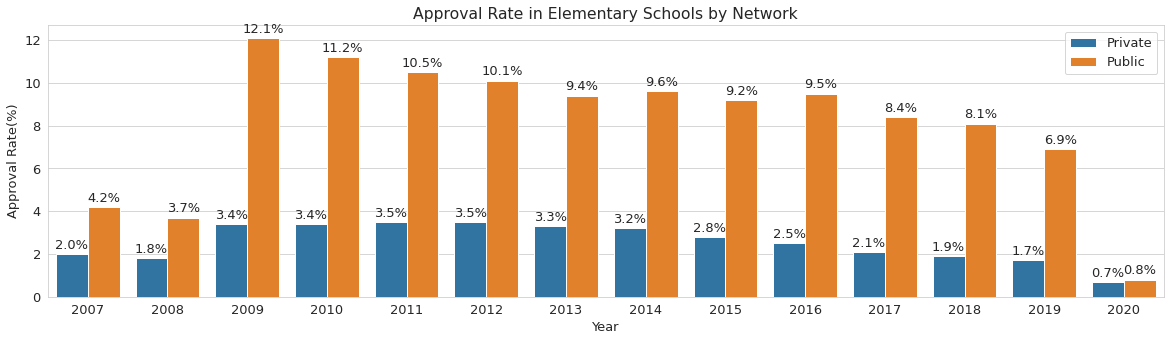

In [210]:
plt.figure(figsize=(20, 5))
sns.set_style("whitegrid")

barplot = sns.barplot(data=fail_public_private, x='Ano', 
                      y='R_EF_Total', hue='Rede')

print_values_on_top(barplot, 0.0)

plt.title("Fail Rate in Elementary Schools by Network")
plt.ylabel("Fail Rate(%)")
plt.xlabel("Year")
plt.legend().set_title(None)
plt.rcParams.update({'font.size': 13});

### Public x Private - High School

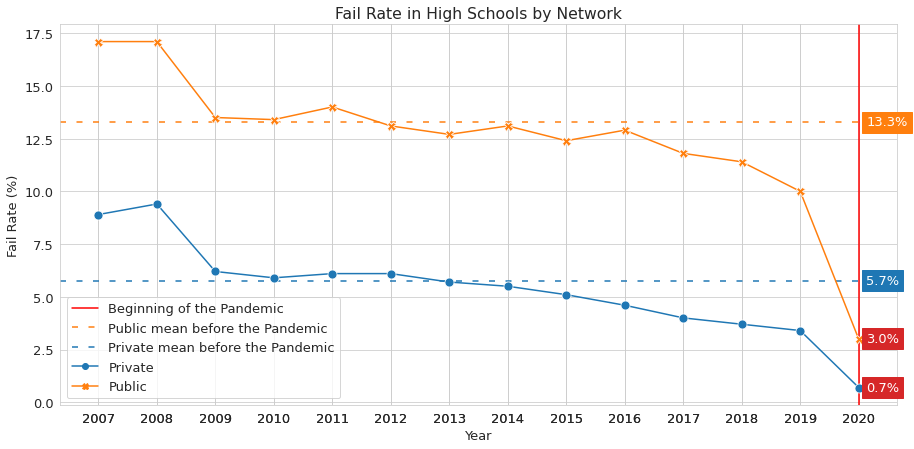

In [213]:
plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")

plt.axvline(x=2020.01, label="Beginning of the Pandemic", color='red', linestyle='-')

plt.axhline(y=public_fail_mean_bp_hs, color='tab:orange', linestyle='dashed', dashes=(4, 7),
            label="Public mean before the Pandemic")
plt.text(2020 + x_shift, public_fail_mean_bp_hs - y_shift, '{:.1f}%'.format(public_fail_mean_bp_hs), color='white').set_backgroundcolor('tab:orange')

plt.axhline(y=private_fail_mean_bp_hs, color='tab:blue', linestyle='dashed', dashes=(4, 7),
            label="Private mean before the Pandemic")
plt.text(2020 + x_shift, private_fail_mean_bp_hs - y_shift, '{:.1f}%'.format(private_fail_mean_bp_hs), color='white').set_backgroundcolor('tab:blue')

ax = sns.lineplot(data=fail_public_private, x='Ano', y='RTotal - EM', 
                  hue='Rede', style='Rede', markers=True, 
                  markersize=markersize, dashes=False)

ax.set(xticks=fail_public_private.Ano.values)

plt.title("Fail Rate in High Schools by Network")
plt.ylabel("Fail Rate (%)")
plt.xlabel("Year")
plt.legend().set_title(None)

y_2020_public = fail_public_private.query('Ano == 2020 & Rede == "Public"')['RTotal - EM'].iloc[0]
plt.text(2020 + x_shift, y_2020_public - y_shift, '{:.1f}%'.format(y_2020_public), color='white').set_backgroundcolor('tab:red')

y_2020_private = fail_public_private.query('Ano == 2020 & Rede == "Private"')['RTotal - EM'].iloc[0]
plt.text(2020 + x_shift, y_2020_private - y_shift, '{:.1f}%'.format(y_2020_private), color='white').set_backgroundcolor('tab:red')

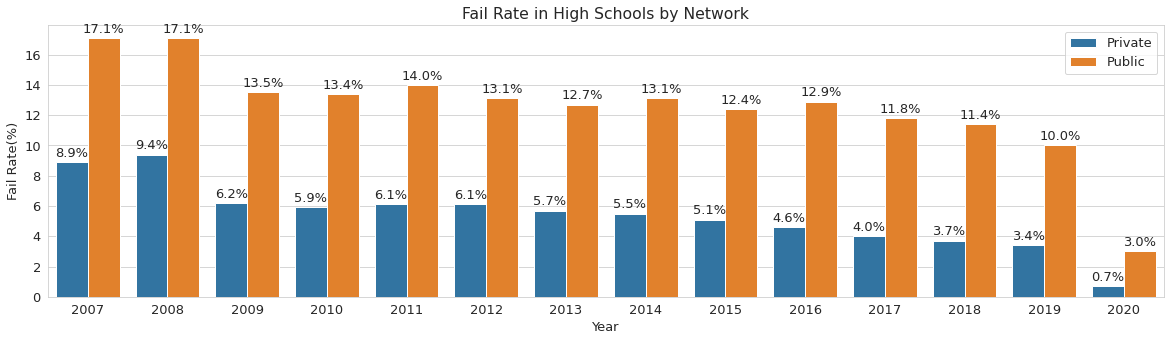

In [214]:
plt.figure(figsize=(20, 5))
sns.set_style("whitegrid")

barplot = sns.barplot(data=fail_public_private, x='Ano', 
                      y='RTotal - EM', hue='Rede')

print_values_on_top(barplot, 0.0)

plt.title("Fail Rate in High Schools by Network")
plt.ylabel("Fail Rate(%)")
plt.xlabel("Year")
plt.legend().set_title(None)
plt.rcParams.update({'font.size': 13});